In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
file_location = 'https://raw.githubusercontent.com/Illiyas124/LEARN-Learning-program-in-COURSERA/refs/heads/main/churn_df.csv'
churn_df = pd.read_csv(file_location)
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [17]:
#check class balance
churn_df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [18]:
#Drop Tenure and Age variables
churn_df = churn_df.drop(['Tenure','Age'],axis = 1)
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [19]:
#Define the y variable
y = churn_df['Exited']
#Define the predictor variable
x = churn_df.copy()
x = x.drop('Exited', axis = 1)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 42)

In [20]:
#Fit the model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

#Get the predictions on test data
y_preds = gnb.predict(x_test)

In [21]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
#Check unique values in predictions
np.unique(y_preds)

array([0])

In [23]:
#Get descriptive stats for data
x.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


In [24]:
#Import the scaler function
from sklearn.preprocessing import MinMaxScaler

#Instantiate the scaler
scaler = MinMaxScaler()

#Fit the scaler to the training data
scaler.fit(x_train)

#Transform the training and test data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
#Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(x_train, y_train)

#Get the predictions on test data
scaled_preds = gnb_scaled.predict(x_test)

In [28]:
def conf_matrix_plot(model, x_data, y_data):
  model_pred = model.predict(x_data)
  cm = confusion_matrix(y_data, model_pred, labels = model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= model.classes_)
  disp.plot()
  plt.show()

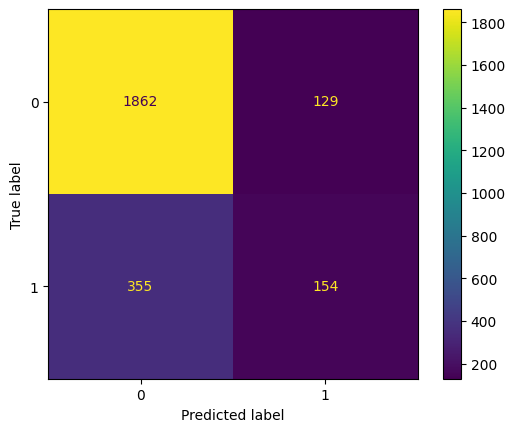

In [29]:
conf_matrix_plot(gnb_scaled, x_test, y_test)